[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Mj_sMxYsI0oUCzgRWEs5K3WMn3jjfjmc?usp=sharing)

https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CV_with_Pillow.ipynb


1. [Pillow: Basics](#Pillow-Basics)
2. [Image Object in Pillow](#Image-Object-in-Pillow)
3. [Displaying Images in Python with Pillow and Matplotlib](#Displaying-Images-in-Python-with-Pillow-and-Matplotlib)
4. [Converting an Image to Grayscale and Understanding RGB Images](#Converting-an-Image-to-Grayscale-and-Understanding-RGB-Images)
5. [Basic Image Manipulation with Pillow](#Basic-Image-Manipulation-with-Pillow)
6. [Image Transformations: Enhancing Contrast, Brightness, Color, and Sharpness with PIL](#Image-Transformations:-Enhancing-Contrast,-Brightness,-Color,-and-Sharpness-with-PIL)

# Pillow: Basics
[Pillow](https://pillow.readthedocs.io/en/stable/) is an open-source Python Imaging Library that adds image processing capabilities to your Python interpreter.

**Installing Pillow:**
```python
!pip install Pillow
```

**Key Features:**
- Reading, writing, and manipulating images.
- Supports a variety of file formats, including JPEG, PNG, BMP, GIF, and others.

# Image Object in Pillow

- Images in Pillow are represented as `Image` objects.
- Pixel data can be accessed and modified directly.
- Provides a range of built-in functions for image manipulation.

An image in Pillow is treated as an `Image` object. To work with images, you first need to import the Pillow library and load an image.


In [ ]:
from PIL import Image
import numpy as np
import urllib.request

# Download an image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
urllib.request.urlretrieve(url, "sample.png")

# Load an image
image =Image.open("sample.png")

**Attributes of an Image Object in Pillow:**

When working with the Pillow library in Python, the `Image` object is central. It provides several attributes that give information about the image and allow for manipulation. Here's an overview of some key attributes:

**`format`**
- The `format` attribute indicates the format of the source file, such as JPEG, PNG, etc.

**`size`**
- The `size` attribute returns a tuple representing the width and height of the image in pixels.

**`mode`**
- The `mode` attribute defines the type and depth of a pixel in the image. Common modes are "L" for grayscale images, "RGB" for true color images, and "CMYK" for pre-press images.

**`info`**
- The `info` attribute is a dictionary containing various metadata about the image, such as "dpi", "exif", etc.




In [ ]:
print('format:', image.format)  # Output might be 'JPEG', 'PNG', etc.
print('size:', image.size)  # Output might be (width, height) like (640, 480)
print('mode:', image.mode)  # Output might be 'RGB', 'L', etc.
print('info:', image.info)  # Output might be a dictionary with metadata

We can convert a Pillow Image object to a NumPy array:

In [ ]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Display the shape of the array
print(image_array.shape)  # The shape will be in the form of (height, width, channels)

In [ ]:
image_array[:3,:3,:]

In [ ]:
# Convert the NumPy array back to a Pillow Image object
new_image = Image.fromarray(image_array)

# Displaying Images in Python with Pillow and Matplotlib

Visualizing images is a key part of working with image processing in Python. There are multiple ways to display images, the two common ones being using Pillow's built-in `.show()` method and using the `matplotlib` library.

## Using Pillow's `.show()` Method

Pillow's `.show()` method is the simplest way to display an image. This method opens the image in the default image viewer of your operating system.

In [ ]:
image.show()

## Using Matplotlib

`matplotlib` is a powerful plotting library in Python that can also be used for displaying images. This method is especially useful in Jupyter notebooks or when you need more control over how the image is displayed.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow(np.array(image))
plt.axis('off')  # Turn off axis numbers and labels
plt.show()

# Converting an Image to Grayscale and Understanding RGB Images

Converting color images to grayscale is a common operation in image processing. This section explains RGB images, how to split them into channels, plot these channels, and the concept of quantization.

## What is an RGB Image?

An RGB image is a color image composed of three color channels: Red, Green, and Blue. Each pixel in an RGB image has three values corresponding to the intensity of red, green, and blue at that pixel. These intensities usually range from 0 to 255 (8-bit quantization).

## Splitting an Image into RGB Channels

You can split an RGB image into its individual red, green, and blue components using Pillow:

In [ ]:
print(image.mode)  # Output: 'RGB'
r, g, b = image.split()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(r, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()

### Converting to Grayscale

Grayscale images contain only shades of gray and no color. The grayscale value is typically calculated as a weighted sum of the RGB components.

When you convert an RGB image to grayscale using Pillow's convert('L') method, the mode changes from 'RGB' to 'L'. In 'L' mode, each pixel is represented by a single value, indicating luminance (or light intensity), which ranges from 0 (black) to 255 (white). This mode is used for grayscale images.

In [ ]:
gray_image = image.convert('L')
print(gray_image.mode)  # Output: 'L'

In [ ]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Basic Image Manipulation with Pillow

Pillow provides a variety of methods for basic image manipulation. These include transposing (flipping and rotating) the image, cropping, and resizing. Understanding these operations is essential for image processing tasks.

## Transposing an Image

The `.transpose()` method in Pillow is used to flip or rotate an image in various ways. Here are some common transpositions:

- `Image.FLIP_LEFT_RIGHT`: Flip the image horizontally (left to right).
- `Image.FLIP_TOP_BOTTOM`: Flip the image vertically (top to bottom).
- `Image.ROTATE_90`: Rotate the image by 90 degrees.
- `Image.ROTATE_180`: Rotate the image by 180 degrees.
- `Image.ROTATE_270`: Rotate the image by 270 degrees.
- `Image.TRANSPOSE`: Transpose the image (flip over the main diagonal).
- `Image.TRANSVERSE`: Transverse the image (flip over the secondary diagonal).


In [ ]:
# Apply different transpositions and rotations
flipped_lr = image.transpose(Image.FLIP_LEFT_RIGHT)
flipped_tb = image.transpose(Image.FLIP_TOP_BOTTOM)
rotated_90 = image.transpose(Image.ROTATE_90)
rotated_180 = image.transpose(Image.ROTATE_180)
rotated_270 = image.transpose(Image.ROTATE_270)
transposed = image.transpose(Image.TRANSPOSE)
transversed = image.transpose(Image.TRANSVERSE)

# Plotting all the images with titles
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Original Image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

# Flipped Left-Right
axs[0, 1].imshow(flipped_lr)
axs[0, 1].set_title("Flip Left-Right")
axs[0, 1].axis('off')

# Flipped Top-Bottom
axs[0, 2].imshow(flipped_tb)
axs[0, 2].set_title("Flip Top-Bottom")
axs[0, 2].axis('off')

# Rotated 90°
axs[1, 0].imshow(rotated_90)
axs[1, 0].set_title("Rotate 90°")
axs[1, 0].axis('off')

# Rotated 180°
axs[1, 1].imshow(rotated_180)
axs[1, 1].set_title("Rotate 180°")
axs[1, 1].axis('off')

# Rotated 270°
axs[1, 2].imshow(rotated_270)
axs[1, 2].set_title("Rotate 270°")
axs[1, 2].axis('off')

# Transpose
axs[2, 0].imshow(transposed)
axs[2, 0].set_title("Transpose")
axs[2, 0].axis('off')

# Transverse
axs[2, 1].imshow(transversed)
axs[2, 1].set_title("Transverse")
axs[2, 1].axis('off')

# Empty subplot (for layout purposes)
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


## Rotating an Image

The `.rotate()` method allows for rotating the image by a specified number of degrees.


In [ ]:
rotated_image = image.rotate(45)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

## Cropping an Image


The `crop` method in Pillow is used to cut out a rectangular portion of an image. The method takes a single argument, which is a tuple defining the left, upper, right, and lower pixel coordinate.

The tuple `(left, upper, right, lower)` represents:

- `left`: The x-coordinate of the leftmost edge of the cropping box.
- `upper`: The y-coordinate of the top edge of the cropping box.
- `right`: The x-coordinate of the rightmost edge of the cropping box.
- `lower`: The y-coordinate of the bottom edge of the cropping box.

These coordinates are relative to the top-left corner of the image, which is considered the origin `(0, 0)`.

In [ ]:
import matplotlib.patches as patches

crop_box = (100, 100, 300, 300)

# Create a Rectangle patch
rect = patches.Rectangle((crop_box[0], crop_box[1]), crop_box[2] - crop_box[0], crop_box[3] - crop_box[1], linewidth=2, edgecolor='r', facecolor='none')

# Plot the original image and the rectangle
fig, ax = plt.subplots()
ax.imshow(image)
ax.add_patch(rect)
plt.show()

In [ ]:
# Define the box to crop
cropped_image = image.crop(crop_box)

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

In [ ]:
print(image.size, cropped_image.size)

## Resizing an Image

The `resize` method in Pillow is used to change the size of an image. It takes two main arguments:

1. `size`: A tuple `(width, height)` representing the new size of the image.
2. `resample`: The resampling filter to use. This is optional and determines the quality and method of the resizing. Common filters include:
   - `Image.NEAREST`: Fastest resizing filter but with lower quality.
   - `Image.BILINEAR`: Bilinear interpolation.
   - `Image.BICUBIC`: Bicubic interpolation.
   - `Image.LANCZOS`: High-quality downsampling filter.


In [ ]:
resized_image = image.resize((200, 200), Image.LANCZOS)
print(image.size, resized_image.size)

In [ ]:
# Resizing with different methods
nearest = image.resize((200, 200), Image.NEAREST)
bilinear = image.resize((200, 200), Image.BILINEAR)
bicubic = image.resize((200, 200), Image.BICUBIC)
lanczos = image.resize((200, 200), Image.LANCZOS)

# Plotting the images
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(nearest)
axes[0].set_title("NEAREST")
axes[0].axis('off')

axes[1].imshow(bilinear)
axes[1].set_title("BILINEAR")
axes[1].axis('off')

axes[2].imshow(bicubic)
axes[2].set_title("BICUBIC")
axes[2].axis('off')

axes[3].imshow(lanczos)
axes[3].set_title("LANCZOS")
axes[3].axis('off')

plt.show()

## Resizing a Cropped Image to Maintain Original Size

Often, after cropping an image, you may want to resize it back to its original dimensions. This can be done by resizing the cropped image using the original image's dimensions.


In [ ]:
original_size = image.size

# Crop the image
crop_box = (100, 100, 400, 400)
cropped_image = image.crop(crop_box)

# Resize the cropped image to the original size
resized_cropped_image = cropped_image.resize(original_size, Image.LANCZOS)

plt.imshow(resized_cropped_image)
plt.axis('off')
plt.show()

# Image Transformations: Enhancing Contrast, Brightness, Color, and Sharpness with PIL


The `ImageEnhance` class in PIL provides a high-level interface for modifying specific properties of an image. It allows for straightforward adjustments to an image's contrast, brightness, color balance, and sharpness, each crucial for refining the visual appeal and clarity of images in various applications.

## Contrast Enhancement

**What is Contrast?**
Contrast refers to the difference in luminance or color that makes an object distinguishable from others in an image. High contrast images have a pronounced distinction between light and dark areas, while low contrast images have a more uniform brightness or color.

- **Formula:** NewPixel = ((OriginalPixel - Midpoint) * Factor) + Midpoint
- **Factor:** Values greater than 1 increase contrast; values less than 1 decrease it.


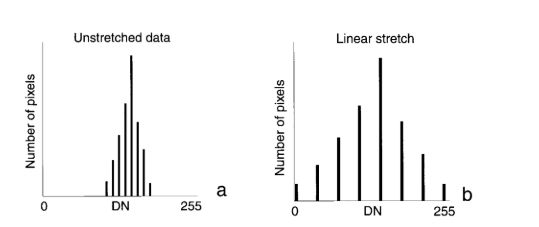

In [ ]:
from PIL import ImageEnhance


# Enhance contrast
enhancer = ImageEnhance.Contrast(image)
contrast_image = enhancer.enhance(2)  # Increase contrast

plt.imshow(contrast_image)
plt.axis('off')
plt.show()

In [ ]:
contrast_factors = [0.5, 1.5, 2.0]
contrast_images = [ImageEnhance.Contrast(image).enhance(factor) for factor in contrast_factors]

# Plot original and contrast-enhanced images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, contrast_image in enumerate(contrast_images, start=2):
    plt.subplot(2, 2, i)
    plt.imshow(contrast_image)
    plt.title(f'Contrast Factor: {contrast_factors[i-2]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Brightness Enhancement

**What is Brightness?**
Brightness is a measure of light intensity in an image. Adjusting brightness changes how light or dark an image appears.


- **Formula:** NewPixel = OriginalPixel * Factor
- **Factor:** Values greater than 1 brighten the image; values less than 1 darken it.



In [ ]:
enhancer = ImageEnhance.Brightness(image)
bright_image = enhancer.enhance(1.5)  # Brighten the image

plt.imshow(bright_image)
plt.axis('off')
plt.show()

In [ ]:
bright_factors = [0.5, 1.5, 2.0]
bright_images = [ImageEnhance.Brightness(image).enhance(factor) for factor in bright_factors]

# Plot original and contrast-enhanced images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, bright_image in enumerate(bright_images, start=2):
    plt.subplot(2, 2, i)
    plt.imshow(bright_image)
    plt.title(f'Bright Factor: {bright_factors[i-2]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Color Balance Enhancement

**What is Color Balance?**
Color balance adjustments affect the intensity and tone of colors in an image. This can be used to correct color casts or to enhance specific color tones.

- **Factor:** An enhancement factor of 0.0 gives a black and white image. A factor of 1.0 gives the original image.

**Algorithm**
- Convert the image to the YIQ color space or a similar space where the luminance (intensity) and color information are separated.
The Y channel represents the luminance, while the I and Q channels represent the chrominance (color information).

- Modify the I and Q channels based on the given factor. A factor greater than 1 increases the color saturation, making the colors more vivid. A factor less than 1 decreases the color saturation, making the image more grayscale.


In [ ]:
enhancer = ImageEnhance.Color(image)
color_enhanced_image = enhancer.enhance(1.2)  # Enhance color

plt.imshow(color_enhanced_image)
plt.axis('off')
plt.show()

In [ ]:
color_factors = [0.25, 0.75, 1.5]
color_images = [ImageEnhance.Color(image).enhance(factor) for factor in color_factors]

# Plot original and contrast-enhanced images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, color_image in enumerate(color_images, start=2):
    plt.subplot(2, 2, i)
    plt.imshow(color_image)
    plt.title(f'Color Factor: {color_factors[i-2]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Sharpness Enhancement

**What is Sharpness?**
Sharpness enhancement increases the clarity of detail in an image by emphasizing edges and fine details.


- **Factor:** Values greater than 1 increase sharpness; values less than 1 decrease it.

In [ ]:
enhancer = ImageEnhance.Sharpness(image)
sharp_image = enhancer.enhance(2)  # Sharpen the image

plt.imshow(sharp_image)
plt.axis('off')
plt.show()

In [ ]:
sharp_factors = [0, 2, 100]
sharp_images = [ImageEnhance.Sharpness(image).enhance(factor) for factor in sharp_factors]

# Plot original and contrast-enhanced images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, sharp_image in enumerate(sharp_images, start=2):
    plt.subplot(2, 2, i)
    plt.imshow(sharp_image)
    plt.title(f'Sharp Factor: {sharp_factors[i-2]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Interactive Demonstration with ipywidgets


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def interactive_enhancements(brightness, contrast, color, sharpness):
    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness)

    enhancer = ImageEnhance.Contrast(enhanced_image)
    enhanced_image = enhancer.enhance(contrast)

    enhancer = ImageEnhance.Color(enhanced_image)
    enhanced_image = enhancer.enhance(color)

    enhancer = ImageEnhance.Sharpness(enhanced_image)
    enhanced_image = enhancer.enhance(sharpness)

    plt.imshow(enhanced_image)
    plt.axis('off')
    plt.show()

brightness_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Brightness:')
contrast_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Contrast:')
color_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Color:')
sharpness_slider = widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Sharpness:')

widgets.interactive(interactive_enhancements, brightness=brightness_slider, contrast=contrast_slider, color=color_slider, sharpness=sharpness_slider)